s spodnjo funkcijo generiramo vse eno ciklične grafe na n vozliščih. Funkcija deluje počasi že za 8 vozlišč. grafov je takrat že več 89 tako, da celostno analizo za večje število vozlič sploh ni smiselno računati.

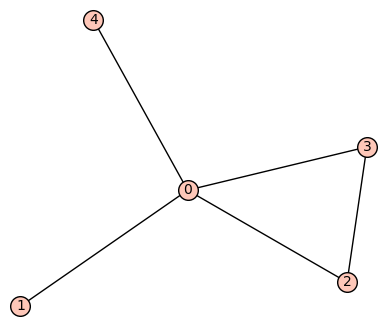

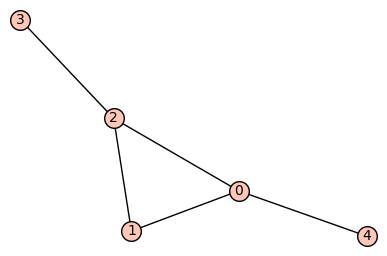

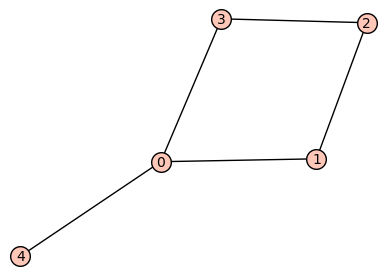

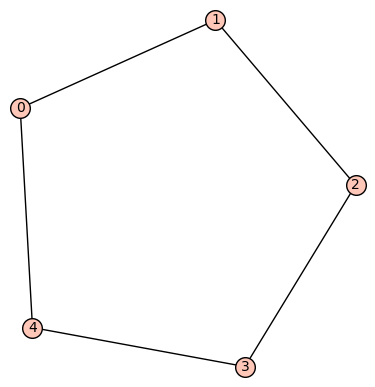

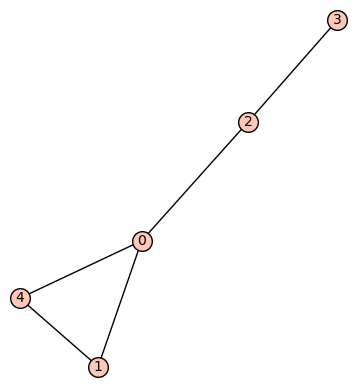

In [99]:
eno_ciklicni =[]
for G in graphs(5, size=5):
    if G.is_connected():
        if len(G.cycle_basis('vertex')) == 1:
            eno_ciklicni.append(G)
            G.show()
            


In [100]:
len(eno_ciklicni)

5

In [101]:
def AZIvrednost(graf): #Izračun AZI vrednost za nek graf, len(graf[u]) nam da dolžino seznama sosedovza vozlišče u, torej je to stopnja vozlišča u
    vsota = 0
    for u in graf:
        for v in graf[u]:
            vsota = vsota + ((len(graf[u]) *len(graf[v]))/(len(graf[u]) + len(graf[v]) - 2))^3
    return vsota/2


In [102]:
AZI_vred = {}
for G in eno_ciklicni:
    a = AZIvrednost(G)
    AZI_vred[a] = (G)


poračunamo ekstremalne vrednosti AZI za vse enciklične grafe in jo izpišemo skupaj z pripadajočim grafom.

40


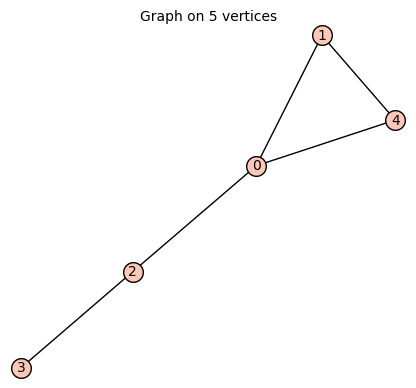

In [103]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

776/27


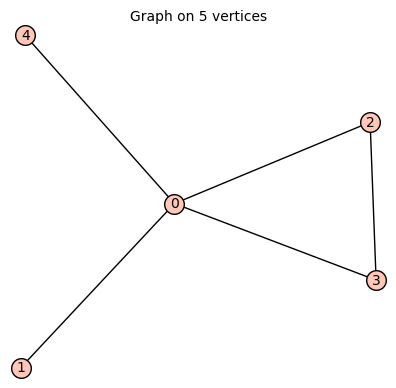

In [104]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

Za velika števila bomo poizkušali rezultat dobiti z iskanjem maksimuma po metodi spreminjanja do sedaj najbolše metode, dela do n=40

In [105]:
def generiranje_grafa(n):
    while 0 < 1:
        A = graphs.RandomGNM(n, n, 'dense')
        if A.is_connected():
            if len(A.cycle_basis('vertex')) == 1:
                return(A)

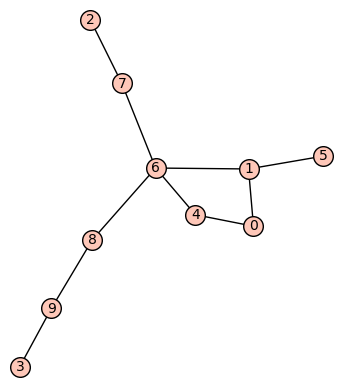

[(0, 1, None),
 (0, 4, None),
 (1, 5, None),
 (1, 6, None),
 (2, 7, None),
 (3, 9, None),
 (4, 6, None),
 (6, 7, None),
 (6, 8, None),
 (8, 9, None)]

In [106]:
B = generiranje_grafa(10)
B.show()
B.edges()

druga opcija: G in graphs.nauty_geng('4 -c')

def generiranje_grafa1(n):
    for A in graphs.nauty_geng('n -c'):
        if A.is_connected():
            if len(A.cycle_basis('vertex')) == 1:
                return(A)

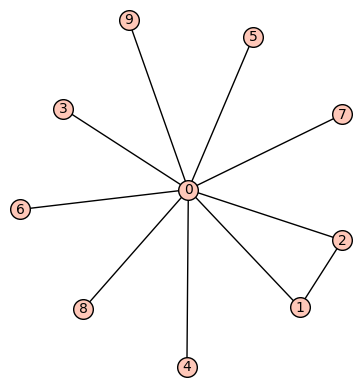

In [107]:
test = Graph({0: [1, 2, 3, 4, 5, 6, 7, 8, 9], 1: [2]})
test.show()

n= 3
for I in graphs.nauty_geng('n -c'):
I.plot()

In [108]:
def AZI_max(graf, n=100, tol=10^-9, i=0):
    for e in graf.edges():
        i += 1
        K = graf
        if i > n:
            return(AZIvrednost(K))
        K.delete_edge(e)
        if K.is_connected():
            for u in K.vertices():
                for v in K.vertices():
                    if u != v:
                        K.add_edge((u, v))                          #povezavo dodamo tako da ustvarimo spet cikel
                        if len(K.cycle_basis('vertex')) == 1:       #preverimo če smo res dobili en sam cikel
                            a = AZIvrednost(K)
                            if a + tol > AZIvrednost(graf):
                                return(AZI_max(K, n, tol, i))
        else:
            for u in K.vertices():                                  #če graf ni povezan moramo dodati drevedno povezavo 
                for v in K.vertices():                              #gremo po vseh vozliščih
                    if K.distance(u, v) > n:                        #izberemo vozlišče, ki ga v grafu še ni
                        if u != v:
                            K.add_edge((u, v))                      #to preverimo z funkcijo .distance()
                            if K.is_connected():
                                a = AZIvrednost(K)                  #isti postopek kot zgoraj
                                if a + tol > AZIvrednost(graf):
                                    return(AZI_max(K, n, tol, i))

In [109]:
AZI_max(test)

17391/512

In [110]:
def AZI_min(graf, n=100, tol=10^-9, i=0):
    for e in graf.edges():
        i += 1
        K = graf
        if i > n:
            return(AZIvrednost(K))
        K.delete_edge(e)
        if K.is_connected():
            for u in K.vertices():
                for v in K.vertices():
                    if u != v:
                        K.add_edge((u, v))                         #povezavo dodamo tako da ustvarimo spet cikel
                        if len(K.cycle_basis('vertex')) == 1:      #preverimo če smo res dobili en sam cikel
                            a = AZIvrednost(K)
                            if a - tol < AZIvrednost(graf):
                                return(AZI_min(K, n, tol, i))
        else:
            for u in K.vertices():                                  #če graf ni povezan moramo dodati drevedno povezavo 
                for v in K.vertices():                              #gremo po vseh vozliščih
                    if K.distance(u, v) > n:                        #izberemo vozlišče, ki ga v grafu še ni
                        if u != v:
                            K.add_edge((u, v))                      #to preverimo z funkcijo .distance()
                            if K.is_connected():
                                a = AZIvrednost(K)                  #isti postopek kot zgoraj
                                if a - tol < AZIvrednost(graf):
                                    return(AZI_min(K, n, tol, i))

In [111]:
AZI_min(test)

17391/512